# ML Project: Reddit Activity and Stock Price Performance

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

from analysis_auxiliary import (
    add_word_counter,
    analyze_sentiment,
    create_date_cols_reddit_data,
    create_date_cols_stock_data,
    merge_reddit_and_stock_data,
    plot,
)

# Prepare Data

In [2]:
# Load wallstreetbets data
wsb_sep_jan = pd.read_csv("data/wsb_sep_01_jan_30.csv")
wsb_jan_feb = pd.read_csv("data/wsb_jan_31_feb_20.csv")
wsb_feb = pd.read_csv("data/wsb_feb_20_feb_28.csv")
wsb = pd.concat([wsb_sep_jan, wsb_jan_feb, wsb_feb])
wsb = create_date_cols_reddit_data(wsb, "date")

wsb_GME = add_word_counter(
    wsb,
    text_col="title",
    buzz_words=["GME", "Gamestop"],
    counter_col="GME_counts",
    case_sensitive=False,
)
wsb_AMC = add_word_counter(
    wsb,
    text_col="title",
    buzz_words=["AMC", "Gamestop"],
    counter_col="AMC_counts",
    case_sensitive=False,
)
wsb_BB = add_word_counter(
    wsb,
    text_col="title",
    buzz_words=["BB", "BlackBerry", "Black Berry"],
    counter_col="BB_counts",
    case_sensitive=False,
)
wsb_NOK = add_word_counter(
    wsb,
    text_col="title",
    buzz_words=["NOK", "Nokia"],
    counter_col="NOK_counts",
    case_sensitive=False,
)

# Load stock data
stock = pd.read_csv("data/memestocks.csv")

gme = create_date_cols_stock_data(stock, "date", stock_name="GME")
amc = create_date_cols_stock_data(stock, "date", stock_name="AMC")
bb = create_date_cols_stock_data(stock, "date", stock_name="BB")
nok = create_date_cols_stock_data(stock, "date", stock_name="NOK")

In [3]:
# Sentiment Analysis
wsb_GME = analyze_sentiment(wsb_GME, "title")
wsb_AMC = analyze_sentiment(wsb_AMC, "title")
wsb_BB = analyze_sentiment(wsb_BB, "title")
wsb_NOK = analyze_sentiment(wsb_NOK, "title")

In [4]:
# Merge DataFrames
reddit_gme_hourly = merge_reddit_and_stock_data(wsb_GME, gme, "date_hour", "GME_counts")
reddit_gme_daily = merge_reddit_and_stock_data(wsb_GME, gme, "date_day", "GME_counts")

reddit_amc_hourly = merge_reddit_and_stock_data(wsb_AMC, amc, "date_hour", "AMC_counts")
reddit_amc_daily = merge_reddit_and_stock_data(wsb_AMC, amc, "date_day", "AMC_counts")

reddit_bb_hourly = merge_reddit_and_stock_data(wsb_BB, bb, "date_hour", "BB_counts")
reddit_bb_daily = merge_reddit_and_stock_data(wsb_BB, bb, "date_day", "BB_counts")

reddit_nok_hourly = merge_reddit_and_stock_data(wsb_NOK, nok, "date_hour", "NOK_counts")
reddit_nok_daily = merge_reddit_and_stock_data(wsb_NOK, nok, "date_day", "NOK_counts")

## Result 1: Mentions of Stock in *wallstreetbets* Subreddit and Performance of Stock Price

## *GameStop*

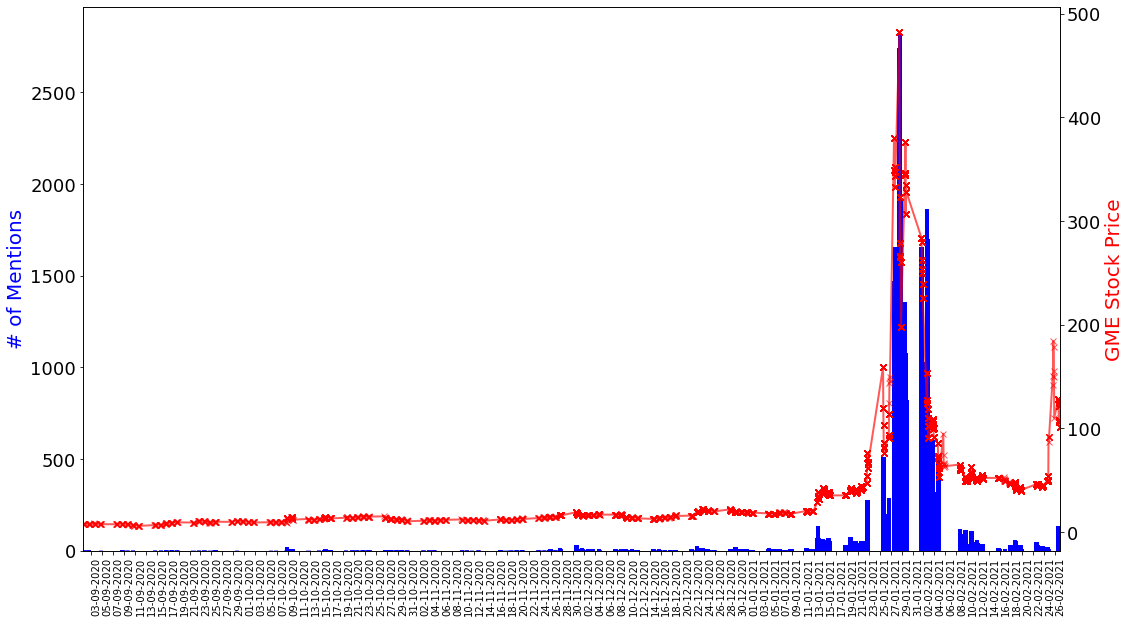

In [5]:
plot(
    reddit_gme_hourly[reddit_gme_hourly["date_hour"] <= wsb_GME["date_hour"].max()],
    date_col="date_hour",
    count_col="GME_counts",
    stock_price_col="high",
    stock_name="GME",
    save_as="plots/correlation_gme_stock_price.png",
)

## *AMC*

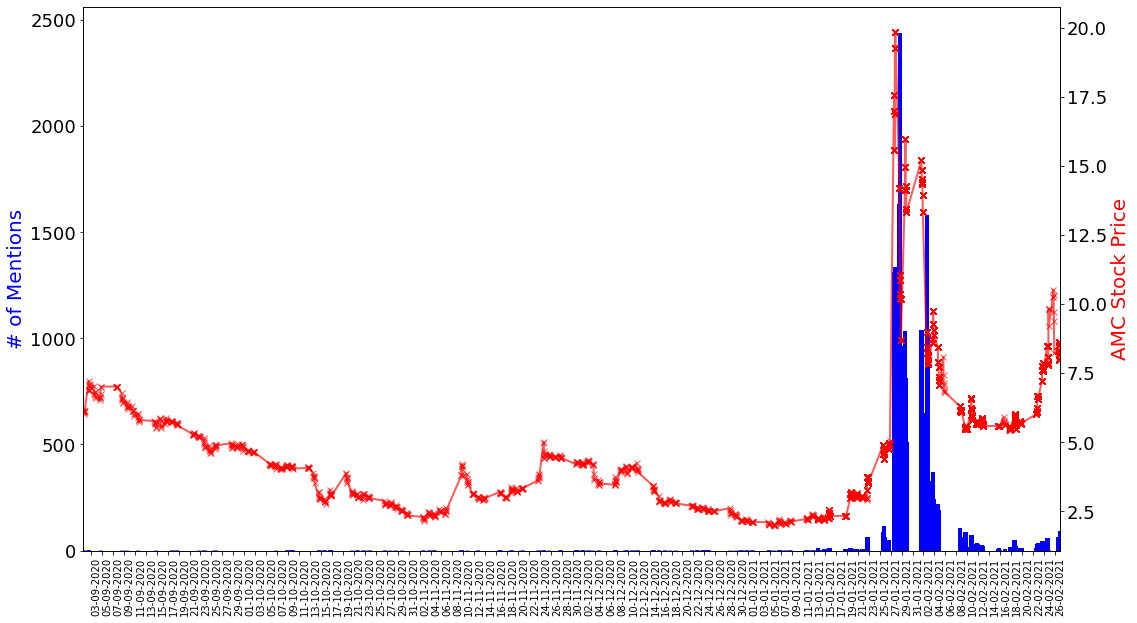

In [6]:
plot(
    reddit_amc_hourly[reddit_amc_hourly["date_hour"] <= wsb_AMC["date_hour"].max()],
    date_col="date_hour",
    count_col="AMC_counts",
    stock_price_col="high",
    stock_name="AMC",
    save_as="plots/correlation_amc_stock_price.png",
)

## *BlackBerry*

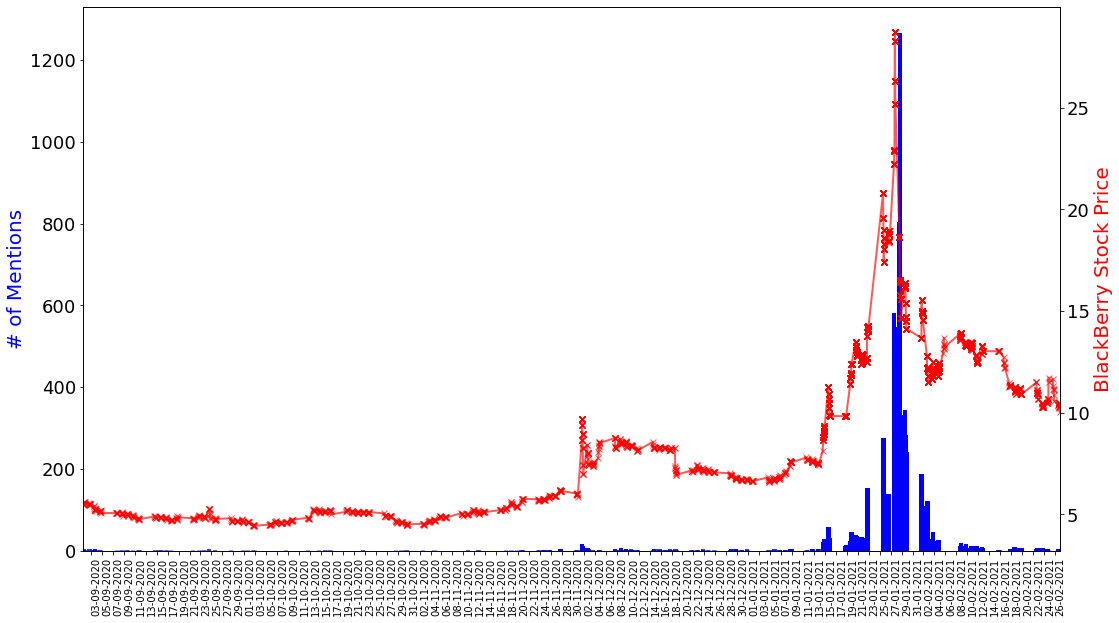

In [7]:
plot(
    reddit_bb_hourly[reddit_bb_hourly["date_hour"] <= wsb_BB["date_hour"].max()],
    date_col="date_hour",
    count_col="BB_counts",
    stock_price_col="high",
    stock_name="BlackBerry",
    save_as="plots/correlation_bb_stock_price.png",
)

## Nokia

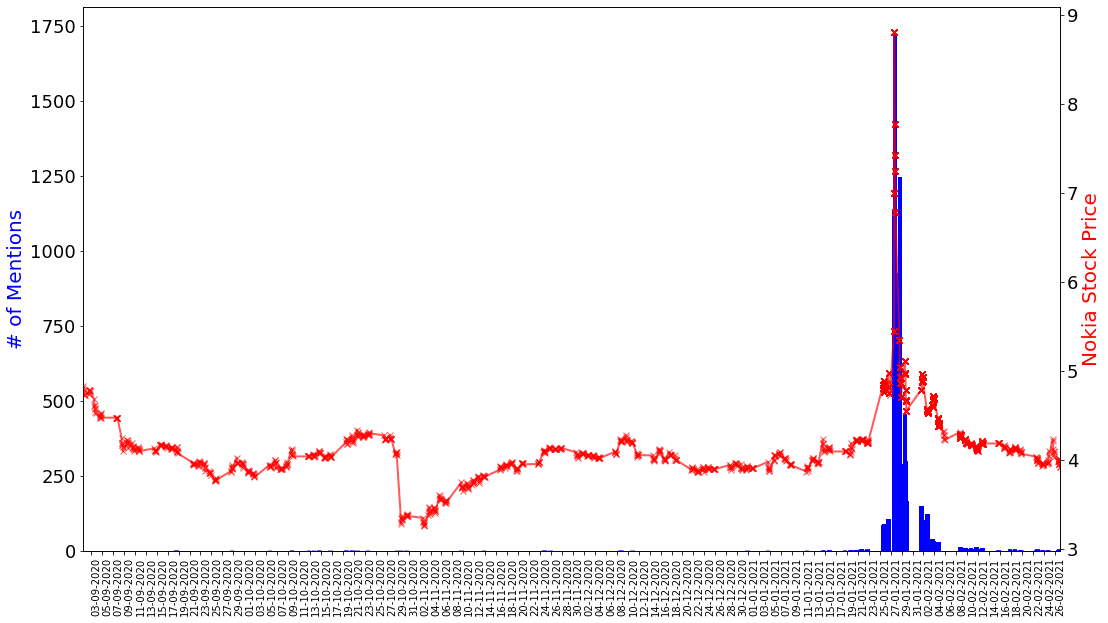

In [8]:
plot(
    reddit_nok_hourly[reddit_nok_hourly["date_hour"] <= wsb_NOK["date_hour"].max()],
    date_col="date_hour",
    count_col="NOK_counts",
    stock_price_col="high",
    stock_name="Nokia",
    save_as="plots/correlation_nok_stock_price.png",
)

## Result 2: Sentiment Analysis

## *GameStop*

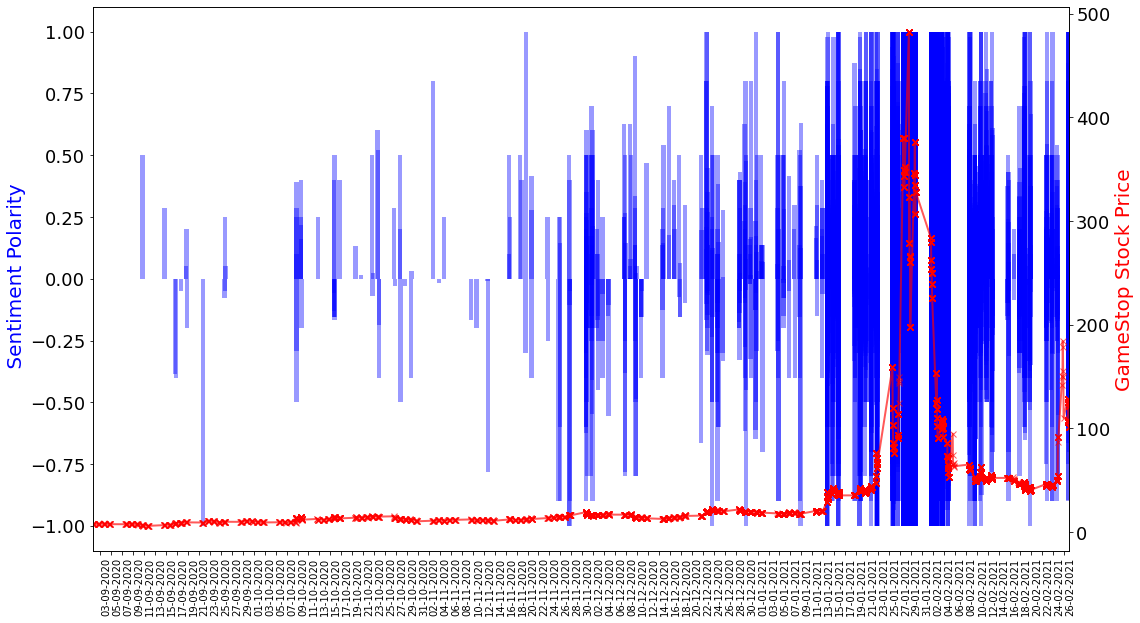

In [9]:
plot(
    reddit_gme_hourly[reddit_gme_hourly["date_hour"] <= wsb_GME["date_hour"].max()],
    date_col="date_hour",
    count_col="sentiment_polarity",
    y_label=" Sentiment Polarity",
    stock_price_col="high",
    stock_name="GameStop",
    save_as="plots/sentiment_polarity_gme_with_stock_price.png",
)

## *AMC*

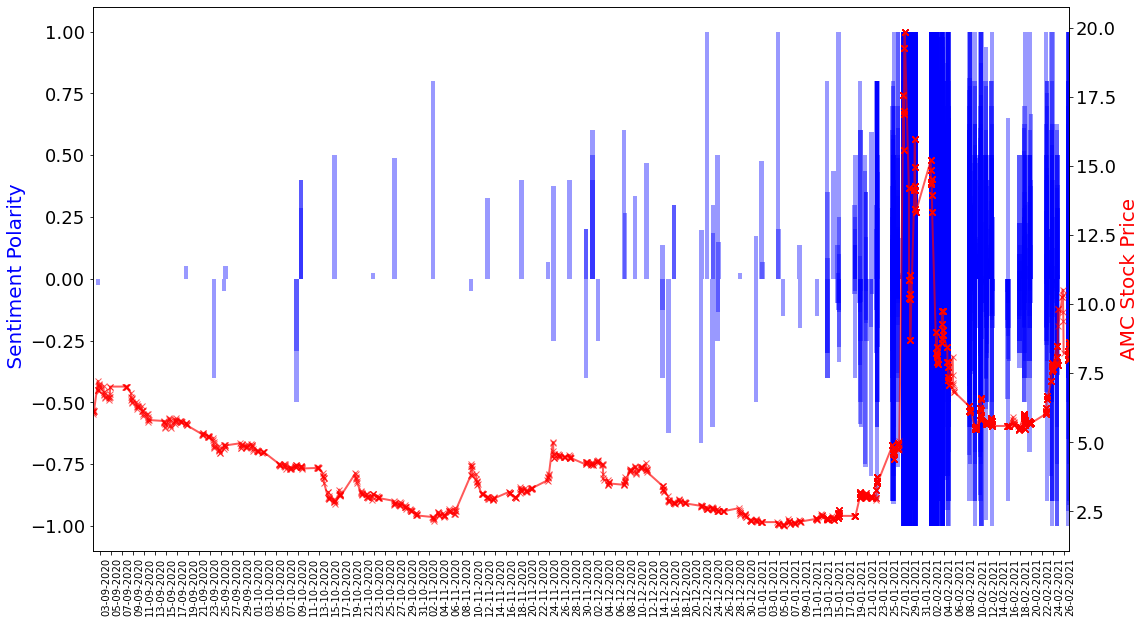

In [10]:
plot(
    reddit_amc_hourly[reddit_amc_hourly["date_hour"] <= wsb_AMC["date_hour"].max()],
    date_col="date_hour",
    count_col="sentiment_polarity",
    y_label=" Sentiment Polarity",
    stock_price_col="high",
    stock_name="AMC",
    save_as="plots/sentiment_polarity_amc_with_stock_price.png",
)

## *BlackBerry*

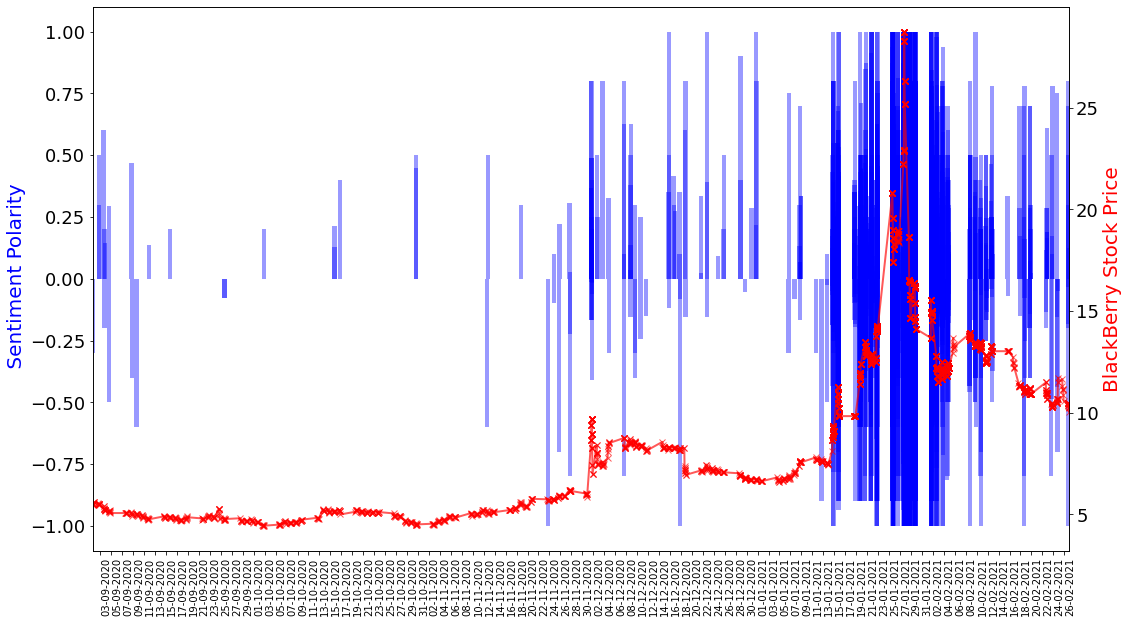

In [11]:
plot(
    reddit_bb_hourly[reddit_bb_hourly["date_hour"] <= wsb_BB["date_hour"].max()],
    date_col="date_hour",
    count_col="sentiment_polarity",
    y_label=" Sentiment Polarity",
    stock_price_col="high",
    stock_name="BlackBerry",
    save_as="plots/sentiment_polarity_bb_with_stock_price.png",
)

## Nokia

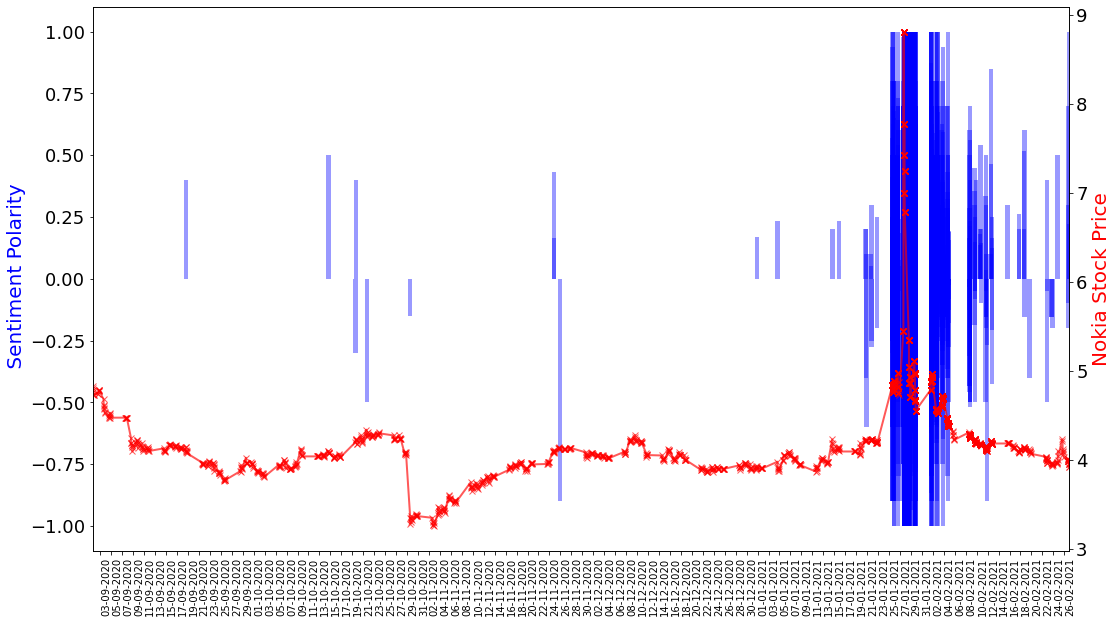

In [12]:
plot(
    reddit_nok_hourly[reddit_nok_hourly["date_hour"] <= wsb_NOK["date_hour"].max()],
    date_col="date_hour",
    count_col="sentiment_polarity",
    y_label=" Sentiment Polarity",
    stock_price_col="high",
    stock_name="Nokia",
    save_as="plots/sentiment_polarity_nok_with_stock_price.png",
)